In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from src.pipeline import predict_pipeline as pp
import warnings 
warnings.filterwarnings("ignore")

In [2]:
classify_obj = pp.classification()

Plot the pixel clusters

In [12]:
classify_obj.plot_pixels()

plot the pixel coordinates

In [13]:
classify_obj.plot_test_pad_coordinates(
)

In [14]:
raw_data = pd.read_csv('data/TestPad_PCB_XYRGB_V2.csv')

In [15]:
def convert_to_numpy(dataframe: pd.DataFrame):

    red =dataframe.pivot(index='Y',columns='X',values='R').to_numpy()
    green =dataframe.pivot(index='Y',columns='X',values='G').to_numpy()
    blue =dataframe.pivot(index='Y',columns='X',values='B').to_numpy()
    
    return np.dstack((red, green, blue))

pcb_img = convert_to_numpy(raw_data)

In [28]:
fig = px.imshow(pcb_img)
fig.show()

Overlaying the pcb image with the coordinates to see if they align

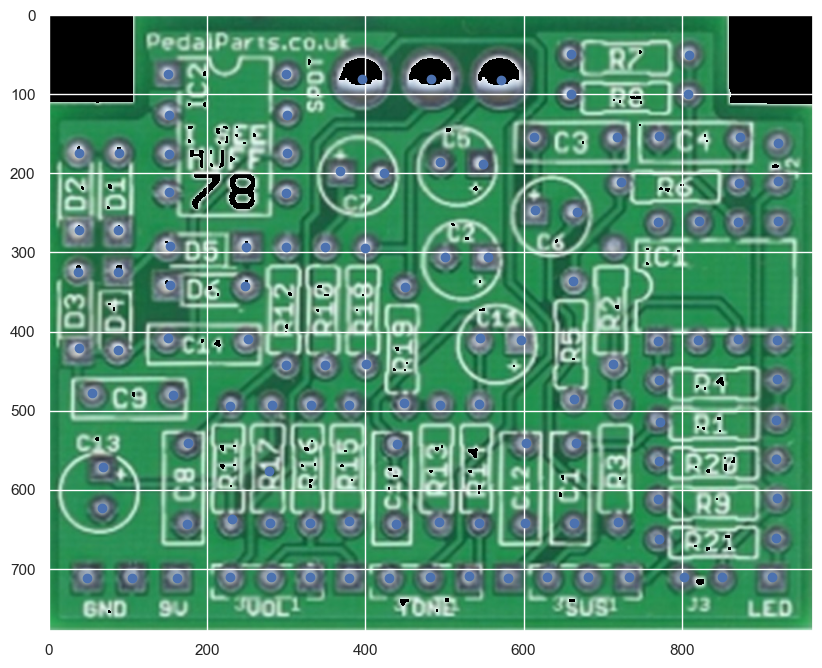

In [29]:
test_pad_coordinates = classify_obj.test_pad_coordinates()
plt.imshow(pcb_img)
plt.scatter(
    x=test_pad_coordinates['X'],
    y=test_pad_coordinates['Y']
)
plt.show()

I have a total of 117 test pads, I missed 1 and made up 4 extra ones